# Session 9. Logit from sklearn using Telco_Churn

This notebook provides an example code of predicting whether a customer will churn or not given the explanatory variables. 

Dependent variable - <b>Churn (1-yes, 0-no)</b> 

The general sequence of steps that we will follow is the following:

- Data manipulation
    - Describing the data (checking for NAs, summary statistics of our variables, etc)
    - Checking for correlations between numeric variables
    - Creating dummy variables from categorical variables
    - Doing train and test split
- Model construction and interpretation
    - Model 1: Logistic Regression from sklearn
    - Model 2: Logistic regression from sklearn changing hyperparameters
- Sensitivity (recall), Specificity, Overall Accuracy, ROC Curve
    - Predicting probabilities for train and test data
    - Getting confusion matrix for train and test data
    - Calculating Sensitivity (recall), specificity, overall accuracy
    - Calculating ROC_AUC, and drawing ROC curve
- Gain and Lift Chart

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, recall_score, roc_auc_score, roc_curve

In [2]:
data=pd.read_csv("Telco_Churn.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
Unnamed: 0          7043 non-null int64
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7035 non-null float64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7038 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7028 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-

In [4]:
data.isna().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        8
Partner              0
Dependents           0
tenure               5
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      15
TotalCharges        11
Churn                0
dtype: int64

<b>As we see there are missing values, so let's drop them.</b>

In [5]:
data=data.dropna()

In [6]:
data.drop(["Unnamed: 0","customerID"],axis=1,inplace=True)

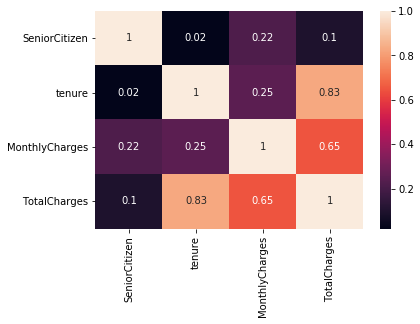

In [7]:
sns.heatmap(data.corr().abs().round(2),annot=True)

As the correlation tenure and TotalCharges is 83% then we should decide which one to drop. 

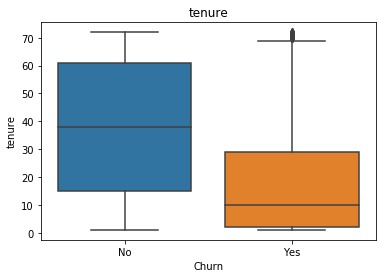

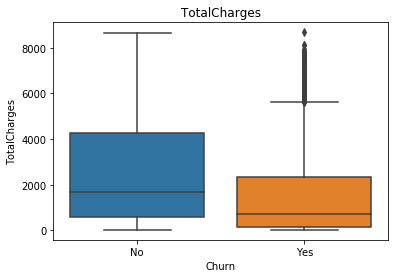

In [8]:
for i in ["tenure","TotalCharges"]:
    sns.boxplot(data.Churn,data[i])
    plt.title(i)
    plt.show()

<b>Let's drop total charges.</b>

In [9]:
data.drop("TotalCharges",axis=1,inplace=True)

In [10]:
data=pd.get_dummies(data,drop_first=True)

In [11]:
X=data.drop("Churn_Yes",axis=1)
Y=data.Churn_Yes

In [12]:
x_train, x_test, y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# Model 1: Logit

In [13]:
#base probability
y_train.value_counts()/len(y_train)*100

0    73.158195
1    26.841805
Name: Churn_Yes, dtype: float64

<b>Let's build logit model using <code>LogisticRegression()</code> function from sklearn.</b>

In [14]:
model1=LogisticRegression(random_state=42).fit(x_train,y_train)

In [15]:
print(classification_report(y_test,model1.predict(x_test)))

             precision    recall  f1-score   support

          0       0.86      0.89      0.87      1300
          1       0.64      0.57      0.61       451

avg / total       0.80      0.81      0.80      1751



In [16]:
confusion_matrix(y_test,model1.predict(x_test)).T

array([[1156,  192],
       [ 144,  259]], dtype=int64)

In [17]:
print("roc_auc_train=",roc_auc_score(y_train,model1.predict(x_train)))
print("roc_auc_test=",roc_auc_score(y_test,model1.predict(x_test)))
print("recall_train=",recall_score(y_train,model1.predict(x_train)))
print("recall_test=",recall_score(y_test,model1.predict(x_test)))
print("accuracy train=",model1.score(x_train,y_train)) 
print("accuracy test=",model1.score(x_test,y_test))

roc_auc_train= 0.721302893904917
roc_auc_test= 0.7317550741940986
recall_train= 0.5453900709219858
recall_test= 0.5742793791574279
accuracy train= 0.8027793641728536
accuracy test= 0.8081096516276414


<b>As the results show, most probably there is no overfitting. The scores for tarin and test set are quite close.</b>

In [18]:
#To plot ROC curve, we should get TPR(sensitivity), FPR(1-Specificity) for different thresholds
FPR,TPR,thresholds=roc_curve(y_test,model1.predict_proba(x_test)[:,1])

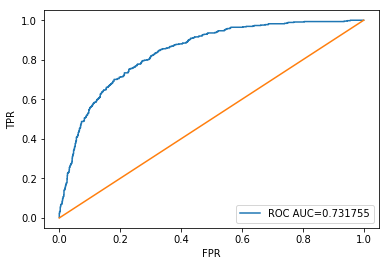

In [19]:
#plotting ROC Curve
plt.plot(FPR,TPR,label="ROC AUC=%f"%roc_auc_score(y_test,model1.predict(x_test)))
plt.plot([0,1],[0,1])
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

# Model 2: Logit (changing hyperparameters)

<b>Let's try to make the model1 better by changing parameters of the model. Let's change C and class_weight.</b>

In [20]:
model2=LogisticRegression(penalty="l1",C=0.05,class_weight="balanced",random_state=42).fit(x_train,y_train)

In [21]:
print("roc_auc_train=",roc_auc_score(y_train,model2.predict(x_train)))
print("roc_auc_test=",roc_auc_score(y_test,model2.predict(x_test)))
print("recall_train=",recall_score(y_train,model2.predict(x_train)))
print("recall_test=",recall_score(y_test,model2.predict(x_test)))
print("accuracy train=",model2.score(x_train,y_train)) 
print("accuracy test=",model2.score(x_test,y_test))

roc_auc_train= 0.7647859329756783
roc_auc_test= 0.753705440900563
recall_train= 0.7929078014184398
recall_test= 0.7804878048780488
accuracy train= 0.7517608985341709
accuracy test= 0.7407195888063963


<b>Compared to Model1, overall accuracy decreased but ROC_AUC and Recall increased.</b>

# Gain and Lift Charts

<b>To construct gain and lift charts, we will use the results of the Model2.</b>

In [22]:
#let's create database using predicted probabilities of the Model2 and y_test
gn_lf=pd.DataFrame(model2.predict_proba(x_test)[:,1],columns=(["Y_Pred_Prob"]))

In [23]:
#let's add true values of y_test to the model
y_test=y_test.reset_index()
gn_lf["y_true"]=y_test.Churn_Yes
gn_lf.head()

,Y_Pred_Prob,y_true
0,0.900330,1
1,0.772570,1
2,0.019710,0
3,0.566055,0
4,0.331680,0


In [24]:
#let's sort the data by probabilities in descending order
gn_lf=gn_lf.sort_values(by=['Y_Pred_Prob'],ascending=False)
gn_lf.head(20)

,Y_Pred_Prob,y_true
993,0.939495,1
1108,0.938091,1
121,0.929793,1
1238,0.927716,1
824,0.925700,1
795,0.924216,1
907,0.924014,1
582,0.922274,1
1008,0.917313,1
998,0.914778,1


In [25]:
#let's devide data into 10 parts and calculate number of "1" in each group(y_true) 
calc=pd.DataFrame(gn_lf.groupby(pd.qcut(gn_lf.Y_Pred_Prob,10))['y_true'].sum()).sort_values(
    by=['Y_Pred_Prob'],ascending=False).reset_index()
calc

,Y_Pred_Prob,y_true
0,"(0.835, 0.939]",127
1,"(0.749, 0.835]",102
2,"(0.625, 0.749]",75
3,"(0.503, 0.625]",46
4,"(0.395, 0.503]",40
5,"(0.283, 0.395]",25
6,"(0.18, 0.283]",21
7,"(0.1, 0.18]",7
8,"(0.0486, 0.1]",5
9,"(0.012899999999999998, 0.0486]",3


In [26]:
#let's calculate how many observations are in each group
obs=pd.DataFrame(gn_lf.groupby(pd.qcut(gn_lf.Y_Pred_Prob,10))['y_true'].count()).sort_values(
    by=['Y_Pred_Prob'],ascending=False).reset_index()
obs

,Y_Pred_Prob,y_true
0,"(0.835, 0.939]",175
1,"(0.749, 0.835]",175
2,"(0.625, 0.749]",175
3,"(0.503, 0.625]",175
4,"(0.395, 0.503]",175
5,"(0.283, 0.395]",175
6,"(0.18, 0.283]",175
7,"(0.1, 0.18]",175
8,"(0.0486, 0.1]",175
9,"(0.012899999999999998, 0.0486]",176


In [28]:
#let's add the number of calculations to the "calc" data
calc["Total"]=obs.y_true
calc

,Y_Pred_Prob,y_true,Total
0,"(0.835, 0.939]",127,175
1,"(0.749, 0.835]",102,175
2,"(0.625, 0.749]",75,175
3,"(0.503, 0.625]",46,175
4,"(0.395, 0.503]",40,175
5,"(0.283, 0.395]",25,175
6,"(0.18, 0.283]",21,175
7,"(0.1, 0.18]",7,175
8,"(0.0486, 0.1]",5,175
9,"(0.012899999999999998, 0.0486]",3,176


In [29]:
#let's put % of observations from overall data for each group
calc["Percent"]=(calc.Total/len(y_test))*100

In [30]:
#let's put cummulative number of observations for each group
calc["Cum_Total"]=calc.Total.cumsum()
calc

,Y_Pred_Prob,y_true,Total,Percent,Cum_Total
0,"(0.835, 0.939]",127,175,9.994289,175
1,"(0.749, 0.835]",102,175,9.994289,350
2,"(0.625, 0.749]",75,175,9.994289,525
3,"(0.503, 0.625]",46,175,9.994289,700
4,"(0.395, 0.503]",40,175,9.994289,875
5,"(0.283, 0.395]",25,175,9.994289,1050
6,"(0.18, 0.283]",21,175,9.994289,1225
7,"(0.1, 0.18]",7,175,9.994289,1400
8,"(0.0486, 0.1]",5,175,9.994289,1575
9,"(0.012899999999999998, 0.0486]",3,176,10.051399,1751


In [31]:
#let's add cummulative % for each group
calc["Cum_Percent"]=calc.Percent.cumsum()
calc

,Y_Pred_Prob,y_true,Total,Percent,Cum_Total,Cum_Percent
0,"(0.835, 0.939]",127,175,9.994289,175,9.994289
1,"(0.749, 0.835]",102,175,9.994289,350,19.988578
2,"(0.625, 0.749]",75,175,9.994289,525,29.982867
3,"(0.503, 0.625]",46,175,9.994289,700,39.977156
4,"(0.395, 0.503]",40,175,9.994289,875,49.971445
5,"(0.283, 0.395]",25,175,9.994289,1050,59.965734
6,"(0.18, 0.283]",21,175,9.994289,1225,69.960023
7,"(0.1, 0.18]",7,175,9.994289,1400,79.954312
8,"(0.0486, 0.1]",5,175,9.994289,1575,89.948601
9,"(0.012899999999999998, 0.0486]",3,176,10.051399,1751,100.000000


In [32]:
#let's calculate cummulative number of "1"s in each group
calc["Cum_y_true"]=calc.y_true.cumsum()
calc

,Y_Pred_Prob,y_true,Total,Percent,Cum_Total,Cum_Percent,Cum_y_true
0,"(0.835, 0.939]",127,175,9.994289,175,9.994289,127
1,"(0.749, 0.835]",102,175,9.994289,350,19.988578,229
2,"(0.625, 0.749]",75,175,9.994289,525,29.982867,304
3,"(0.503, 0.625]",46,175,9.994289,700,39.977156,350
4,"(0.395, 0.503]",40,175,9.994289,875,49.971445,390
5,"(0.283, 0.395]",25,175,9.994289,1050,59.965734,415
6,"(0.18, 0.283]",21,175,9.994289,1225,69.960023,436
7,"(0.1, 0.18]",7,175,9.994289,1400,79.954312,443
8,"(0.0486, 0.1]",5,175,9.994289,1575,89.948601,448
9,"(0.012899999999999998, 0.0486]",3,176,10.051399,1751,100.000000,451


In [33]:
#now, we are ready to calculate gain_score
calc["Gain_Score"]=calc.Cum_y_true/calc.Cum_y_true.iloc[-1]*100
calc

,Y_Pred_Prob,y_true,Total,Percent,Cum_Total,Cum_Percent,Cum_y_true,Gain_Score
0,"(0.835, 0.939]",127,175,9.994289,175,9.994289,127,28.159645
1,"(0.749, 0.835]",102,175,9.994289,350,19.988578,229,50.776053
2,"(0.625, 0.749]",75,175,9.994289,525,29.982867,304,67.405765
3,"(0.503, 0.625]",46,175,9.994289,700,39.977156,350,77.605322
4,"(0.395, 0.503]",40,175,9.994289,875,49.971445,390,86.474501
5,"(0.283, 0.395]",25,175,9.994289,1050,59.965734,415,92.017738
6,"(0.18, 0.283]",21,175,9.994289,1225,69.960023,436,96.674058
7,"(0.1, 0.18]",7,175,9.994289,1400,79.954312,443,98.226164
8,"(0.0486, 0.1]",5,175,9.994289,1575,89.948601,448,99.334812
9,"(0.012899999999999998, 0.0486]",3,176,10.051399,1751,100.000000,451,100.000000


In [34]:
#let's get Lift_Score
calc["Lift_Score"]=(calc.Gain_Score/calc.Cum_Percent)
calc

,Y_Pred_Prob,y_true,Total,Percent,Cum_Total,Cum_Percent,Cum_y_true,Gain_Score,Lift_Score
0,"(0.835, 0.939]",127,175,9.994289,175,9.994289,127,28.159645,2.817574
1,"(0.749, 0.835]",102,175,9.994289,350,19.988578,229,50.776053,2.540253
2,"(0.625, 0.749]",75,175,9.994289,525,29.982867,304,67.405765,2.248143
3,"(0.503, 0.625]",46,175,9.994289,700,39.977156,350,77.605322,1.941242
4,"(0.395, 0.503]",40,175,9.994289,875,49.971445,390,86.474501,1.730478
5,"(0.283, 0.395]",25,175,9.994289,1050,59.965734,415,92.017738,1.534505
6,"(0.18, 0.283]",21,175,9.994289,1225,69.960023,436,96.674058,1.381847
7,"(0.1, 0.18]",7,175,9.994289,1400,79.954312,443,98.226164,1.228529
8,"(0.0486, 0.1]",5,175,9.994289,1575,89.948601,448,99.334812,1.104351
9,"(0.012899999999999998, 0.0486]",3,176,10.051399,1751,100.000000,451,100.000000,1.000000


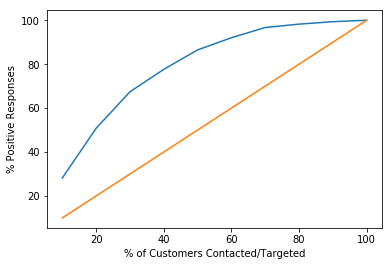

In [35]:
#let's create Gain Chart
plt.plot(calc.Cum_Percent,calc.Gain_Score)
plt.plot(calc.Cum_Percent,calc.Cum_Percent)
plt.xlabel("% of Customers Contacted/Targeted")
plt.ylabel("% Positive Responses")
plt.show()

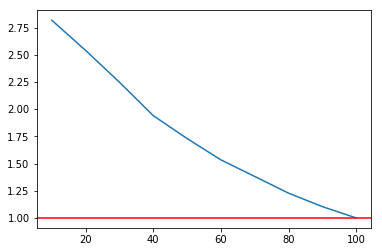

In [36]:
#let's create lift Chart
plt.plot(calc.Cum_Percent,calc.Lift_Score)
plt.axhline(y=1, color="red")
plt.show()